In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
## reading in the data from the data file
data = pd.read_csv('project4.csv')

In [3]:
## treating "?" values in node-caps with "no" because that is the "mode" or most frequent value
data["node-caps"] = data["node-caps"].replace("?","no")

In [4]:
## treating "?" values in breast-quad with "left_low" because that is the "mode" or most frequent value
data["breast-quad"] = data["breast-quad"].replace("?","left_low")

In [5]:
## converting columns to category type for one-hot encoding
data['class'] = data['class'].astype("category")
data['menopause'] = data['menopause'].astype("category")
data['node-caps'] = data['node-caps'].astype("category")
data['breast'] = data['breast'].astype("category")
data['breast-quad'] = data['breast-quad'].astype("category")
data['irradiat'] = data['irradiat'].astype("category")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        286 non-null    category
 1   age          286 non-null    object  
 2   menopause    286 non-null    category
 3   tumor-size   286 non-null    object  
 4   inv-nodes    286 non-null    object  
 5   node-caps    286 non-null    category
 6   deg-malig    286 non-null    int64   
 7   breast       286 non-null    category
 8   breast-quad  286 non-null    category
 9   irradiat     286 non-null    category
dtypes: category(6), int64(1), object(3)
memory usage: 11.6+ KB


In [7]:
data = pd.get_dummies(data, columns=["class", "menopause", "node-caps", 'breast','breast-quad','irradiat'], drop_first=True)

In [8]:
## doing data type conversion on age, tumor-size, and inv-nodes by replacing ranges with their midpoint
data["age"] = data["age"].replace({'20-29':'25', '30-39':'35','40-49':'45','50-59':'55','60-69':'65','70-79':'75'})
data["tumor-size"] = data["tumor-size"].replace({'0-4':'2', '5-9':'7','10-14':'12','15-19':'17','20-24':'22','25-29':'27', '30-34':'32','35-39':'37','40-44':'42','45-49':'47','50-54':'52'})
data["inv-nodes"] = data["inv-nodes"].replace({'0-2':'1', '3-5':'4','6-8':'7','9-11':'10','12-14':'13','15-17':'16','24-26':'25'})

In [9]:
## converting the columns to ints
data["age"] = data["age"].astype(int)
data["tumor-size"] = data["tumor-size"].astype(int)
data["inv-nodes"] = data["inv-nodes"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      286 non-null    int64
 1   tumor-size               286 non-null    int64
 2   inv-nodes                286 non-null    int64
 3   deg-malig                286 non-null    int64
 4   class_recurrence-events  286 non-null    bool 
 5   menopause_lt40           286 non-null    bool 
 6   menopause_premeno        286 non-null    bool 
 7   node-caps_yes            286 non-null    bool 
 8   breast_right             286 non-null    bool 
 9   breast-quad_left_low     286 non-null    bool 
 10  breast-quad_left_up      286 non-null    bool 
 11  breast-quad_right_low    286 non-null    bool 
 12  breast-quad_right_up     286 non-null    bool 
 13  irradiat_yes             286 non-null    bool 
dtypes: bool(10), int64(4)
memory usage: 11.9 KB


In [10]:
data.drop_duplicates(inplace=True, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      272 non-null    int64
 1   tumor-size               272 non-null    int64
 2   inv-nodes                272 non-null    int64
 3   deg-malig                272 non-null    int64
 4   class_recurrence-events  272 non-null    bool 
 5   menopause_lt40           272 non-null    bool 
 6   menopause_premeno        272 non-null    bool 
 7   node-caps_yes            272 non-null    bool 
 8   breast_right             272 non-null    bool 
 9   breast-quad_left_low     272 non-null    bool 
 10  breast-quad_left_up      272 non-null    bool 
 11  breast-quad_right_low    272 non-null    bool 
 12  breast-quad_right_up     272 non-null    bool 
 13  irradiat_yes             272 non-null    bool 
dtypes: bool(10), int64(4)
memory usage: 11.3 KB


<Axes: ylabel='inv-nodes'>

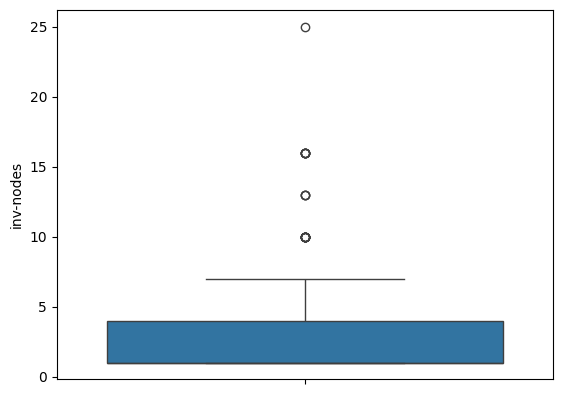

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data['inv-nodes'])

<Axes: ylabel='tumor-size'>

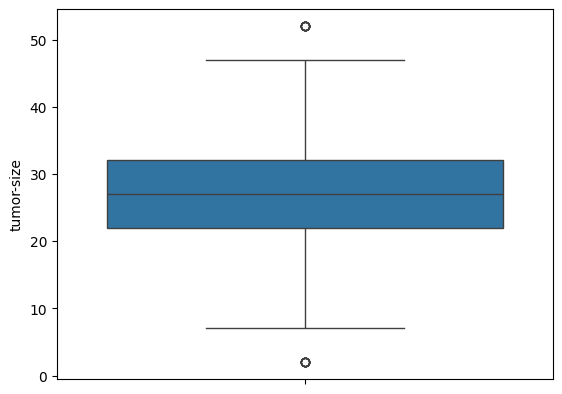

In [12]:
sns.boxplot(data=data['tumor-size']) # few outlier

<Axes: xlabel='age', ylabel='Count'>

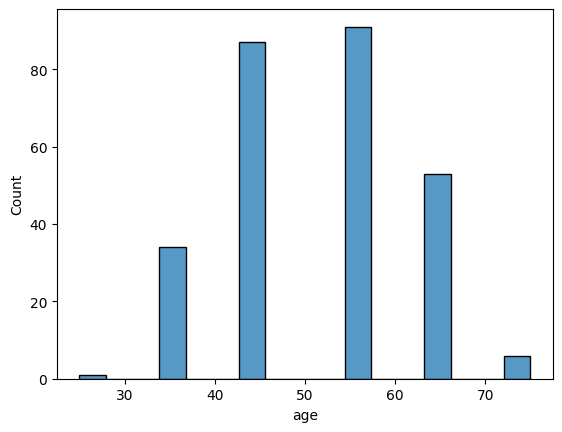

In [13]:
sns.histplot(data=data['age']) # we can see a large count between 40-60

<Axes: xlabel='deg-malig', ylabel='Count'>

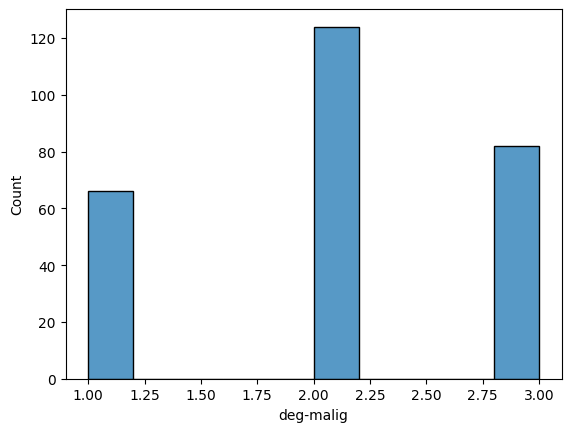

In [14]:
sns.histplot(data=data['deg-malig']) # most are 2 malig

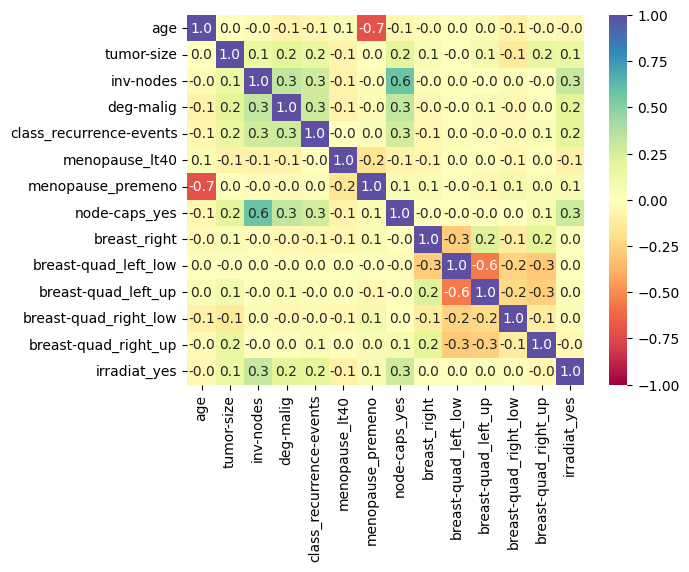

In [15]:

corr_cols = data.columns
# the actual heat map
sns.heatmap(
   data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral"
)
# show the plot
plt.show()

In [16]:
X = data.drop('class_recurrence-events', axis=1)
y = data['class_recurrence-events']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [17]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [18]:
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
accuracy_test

0.7073170731707317

In [19]:
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
accuracy_train

0.7

In [20]:
## attempting to improve accuracy using kernel functions
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train,y_train)
linear_accuracy = accuracy_score(y_test, linear_svc.predict(X_test))
linear_train_accuracy = accuracy_score(y_train, linear_svc.predict(X_train))
linear_accuracy

0.7439024390243902

In [21]:
linear_train_accuracy

0.7368421052631579

In [22]:
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(X_train,y_train)
poly_accuracy = accuracy_score(y_test, poly_svc.predict(X_test))
poly_train_accuracy = accuracy_score(y_train, poly_svc.predict(X_train))
poly_accuracy

0.7073170731707317

In [23]:
poly_train_accuracy

0.7

In [24]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)
rbf_accuracy = accuracy_score(y_test, rbf_svc.predict(X_test))
rbf_train_accuracy = accuracy_score(y_train, rbf_svc.predict(X_train))
rbf_accuracy

0.7073170731707317

In [25]:
rbf_train_accuracy

0.7

In [26]:
sig_svc = svm.SVC(kernel='sigmoid')
sig_svc.fit(X_train,y_train)
sig_accuracy = accuracy_score(y_test, sig_svc.predict(X_test))
sig_train_accuracy = accuracy_score(y_train, sig_svc.predict(X_train))
sig_accuracy

0.7073170731707317

In [27]:
sig_train_accuracy

0.7

In [28]:
## trying to optimize our polynomial svm, default degree is 3
poly_svc2 = svm.SVC(kernel='poly', degree = 12)
poly_svc2.fit(X_train,y_train)
poly_accuracy2 = accuracy_score(y_test, poly_svc2.predict(X_test))
poly_train_accuracy2 = accuracy_score(y_train, poly_svc2.predict(X_train))
poly_accuracy2

0.7073170731707317

In [29]:
poly_train_accuracy2

0.7421052631578947

In [30]:
## trying to see what polynomial degree leads to overfitting
poly_svc3 = svm.SVC(kernel='poly', degree = 18)
poly_svc3.fit(X_train,y_train)
poly_accuracy3 = accuracy_score(y_test, poly_svc3.predict(X_test))
poly_train_accuracy3 = accuracy_score(y_train, poly_svc3.predict(X_train))
poly_accuracy3

0.6707317073170732

In [31]:
poly_train_accuracy3

0.7578947368421053

In [32]:
param_grid = {
    "C" : np.arange(start=1, stop=3),
    "kernel" : ["poly","rbf","sigmoid"],
    "gamma" : ["scale","auto"]
}
model = svm.SVC()
opt = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall")

In [33]:
opt.fit(X_train,y_train)
opt.best_params_

{'C': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [34]:
opt_accuracy = accuracy_score(y_test, opt.predict(X_test))
opt_train_accuracy = accuracy_score(y_train, opt.predict(X_train))
opt_accuracy

0.6219512195121951

In [35]:
opt_train_accuracy

0.8052631578947368

In [36]:
model1 = svm.SVC()
opt1 = GridSearchCV(model1, param_grid, cv=5, n_jobs=8, scoring="accuracy")
opt1.fit(X_train,y_train)
opt1.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [37]:
opt1_accuracy = accuracy_score(y_test, opt1.predict(X_test))
opt1_train_accuracy = accuracy_score(y_train, opt1.predict(X_train))
opt1_accuracy

0.7073170731707317

In [38]:
opt1_train_accuracy

0.7

In [42]:
print(f"SVM REPORTS\n")
print(f"Performance on TEST with Optimized Recall\n*******************\n{classification_report(y_test, opt.predict(X_test))}")
print(f"Performance on TRAIN with Optimized Recall\n********************\n{classification_report(y_train, opt.predict(X_train))}")

SVM REPORTS

Performance on TEST with Optimized Recall
*******************
              precision    recall  f1-score   support

       False       0.72      0.76      0.74        58
        True       0.33      0.29      0.31        24

    accuracy                           0.62        82
   macro avg       0.53      0.53      0.53        82
weighted avg       0.61      0.62      0.61        82

Performance on TRAIN with Optimized Recall
********************
              precision    recall  f1-score   support

       False       0.83      0.90      0.87       133
        True       0.72      0.58      0.64        57

    accuracy                           0.81       190
   macro avg       0.78      0.74      0.75       190
weighted avg       0.80      0.81      0.80       190



In [44]:
print(f"Performance on TEST with Optimized Accuracy\n*******************\n{classification_report(y_test, opt1.predict(X_test))}")
print(f"Performance on TRAIN with Optimized Accuracy\n********************\n{classification_report(y_train, opt1.predict(X_train))}")


Performance on TEST with Optimized Accuracy
*******************
              precision    recall  f1-score   support

       False       0.71      1.00      0.83        58
        True       0.00      0.00      0.00        24

    accuracy                           0.71        82
   macro avg       0.35      0.50      0.41        82
weighted avg       0.50      0.71      0.59        82

Performance on TRAIN with Optimized Accuracy
********************
              precision    recall  f1-score   support

       False       0.70      1.00      0.82       133
        True       0.00      0.00      0.00        57

    accuracy                           0.70       190
   macro avg       0.35      0.50      0.41       190
weighted avg       0.49      0.70      0.58       190



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/m

In [40]:
import pickle
with open('acc_svm', 'wb') as f:
    pickle.dump(opt1,f)
with open('recall_svm', 'wb') as f:
    pickle.dump(opt,f)